## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> </font>

Here, I repeat the iris experiment from the following paper. 

<font color = "red">
Baudat, G., & Anouar, F. (2000). Generalized discriminant analysis using a kernel approach. Neural computation, 12(10), 2385-2404.
</font>
The implementation of GDA was provided by the authors of the paper in matlab. 
I translated their code into python (named 'kfda').
I have also implemented my method of solving KFLDA under the name 'ghiasi_kfda'

# Experiments with Kernel LDA

##### Importing general modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import sklearn
import scipy.stats as st
import scipy.io as sio
import time
import matplotlib.image as mpimg
import matplotlib as mpl

##### Importing modules wtitten by the author

In [2]:
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis
from KernelLinearDiscriminantAnalysis import KernelLinearDiscriminantAnalysis
from LDATrainingDataPreparation import TrainingData

##### Preparing matplotlib to genrate high-quality images for the paper

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

##### Load dataset

In [4]:
def loadIris():
    IrisData=[[50,33,14,2],  [46,36,10,2],  [48,31,16,2],  [49,36,14,1],  [44,32,13,2],
              [51,38,16,2],  [50,30,16,2],  [51,38,19,4],  [49,30,14,2],  [50,36,14,2],  
              [54,34,15,4],  [55,42,14,2],  [44,29,14,2],  [55,35,13,2],  [44,30,13,2],  
              [47,32,16,2],  [50,32,12,2],  [43,30,11,1],  [51,35,14,2],  [50,34,16,4],  
              [52,41,15,1],  [49,31,15,2],  [54,39,17,4],  [47,32,13,2],  [51,34,15,2],  
              [49,31,15,1],  [46,34,14,3],  [51,33,17,5],  [52,34,14,2],  [50,35,16,6],  
              [48,30,14,3],  [48,34,19,2],  [58,40,12,2],  [46,32,14,2],  [57,44,15,4],  
              [50,34,15,2],  [46,31,15,2],  [50,35,13,3],  [48,30,14,1],  [57,38,17,3],  
              [51,37,15,4],  [54,37,15,2],  [54,39,13,4],  [45,23,13,3],  [51,38,15,3],  
              [52,35,15,2],  [51,35,14,3],  [48,34,16,2],  [54,34,17,2],  [53,37,15,2],  
              [57,28,45,13],  [63,33,47,16],  [70,32,47,14],  [58,26,40,12],  [50,23,33,10],  
              [58,27,41,10],  [60,29,45,15],  [49,24,33,10],  [52,27,39,14],  [58,27,39,12],  
              [59,30,42,15],  [62,22,45,15],  [61,30,46,14],  [56,25,39,11],  [64,32,45,15],  
              [54,30,45,15],  [67,31,44,14],  [57,26,35,10],  [57,29,42,13],  [56,27,42,13],  
              [60,34,45,16],  [50,20,30,10],  [62,29,43,13],  [60,22,40,10],  [65,28,46,15],  
              [59,32,48,18],  [60,27,51,16],  [61,28,40,13],  [55,24,38,11],  [55,26,44,12],  
              [56,30,45,15],  [57,30,42,12],  [66,29,46,13],  [55,24,37,10],  [67,31,47,15],  
              [63,23,44,13],  [63,25,49,15],  [51,25,30,11],  [56,29,36,13],  [66,30,44,14],  
              [67,30,50,17],  [61,28,47,12],  [57,28,41,13],  [69,31,49,15],  [55,25,40,13],  
              [68,28,48,14],  [56,30,41,13],  [64,29,43,13],  [61,29,47,14],  [55,23,40,13],  
              [67,31,56,24],  [69,31,51,23],  [65,30,52,20],  [58,27,51,19],  [49,25,45,17],  
              [63,25,50,19],  [63,27,49,18],  [64,28,56,21],  [58,27,51,19],  [64,31,55,18],  
              [60,22,50,15],  [69,32,57,23],  [56,28,49,20],  [67,25,58,18],  [64,28,56,22],  
              [63,28,51,15],  [68,32,59,23],  [62,34,54,23],  [67,33,57,25],  [59,30,51,18],  
              [64,32,53,23],  [67,33,57,21],  [72,32,60,18],  [61,30,49,18],  [77,30,61,23],  
              [60,30,48,18],  [65,30,55,18],  [77,38,67,22],  [76,30,66,21],  [67,30,52,23],  
              [79,38,64,20],  [77,28,67,20],  [61,26,56,14],  [62,28,48,18],  [63,34,56,24],  
              [72,30,58,16],  [71,30,59,21],  [63,29,56,18],  [77,26,69,23],  [74,28,61,19],  
              [73,29,63,18],  [69,31,54,21],  [72,36,61,25],  [68,30,55,21],  [65,32,51,20],  
              [63,33,60,25],  [65,30,58,22],  [64,27,53,19],  [57,25,50,20],  [58,28,51,24]]
    IrisData = np.array(IrisData)  
    N = 150
    dim = 4
    X = np.zeros ([N, dim])
    y = np.zeros (N, dtype = int)
    for n in range (N):
        X[n,:] = IrisData[n,0:dim]
        y[n]   = int (n * 3 // N)
    mean = np.mean(X, axis=0)
    #std  = np.std(X, axis=0)
    std=np.sqrt(np.diag(np.cov(X.T)))
    X = (X - mean) / std

    return X, y    

##### Prepare data for LDA.

In [5]:
def prepareTrainData ():
    np.random.seed(1)
    C = 3
    XTrain, yTrain = loadIris()
    td = TrainingData(XTrain, yTrain)

    clusAlg = sklearn.cluster.KMeans()
    arrayK = np.ones(C, dtype=int)
    td.findSubclasses(arrayK, clusAlg)
    return td

In [6]:
def kernelFunc(x,z):
    sigma2 = 0.7
    d2 = (x-z).T @ (x-z)
    return np.exp(-d2/sigma2)

In [7]:
def performExperiment (solver, approximateKernel):
    td = prepareTrainData()
    klda = KernelLinearDiscriminantAnalysis(td, kernelFunc, solver, 0.0, 0.000001, approximateKernel)
    klda.fitFeatureExtractor()

    XNew = klda.mapTrainingDataToExplicitFeatureMap()
    td_X_old = td.X
    td.X = XNew
    td.computeMeans()
    lda_feat_spc = LinearDiscriminantAnalysis(td, 'ghiasi_svd', 'Sb', 'St', 0.0, 0.000001)
    lda_feat_spc.fitFeatureExtractor()
    objective = lda_feat_spc.objective()
    print('LDA at Exact Explicit Feature Map. Objective: ', objective)
    
    A = klda.mapFeatureVectorsToExplicitFeatureMap()
    lda_feat_spc.model = A
    objective = lda_feat_spc.objective()
    print ('KFDA (Implicit Feature Space).Objective: ', objective)
    
    td.X = td_X_old
    feature = klda.transform (td_X_old)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.xlim([-0.2, 0.4])
    plt.ylim([-0.2, 0.2])
    plt.scatter (feature[0:50,0], feature[0:50,1], marker = '+', facecolors='k', edgecolors='k')
    plt.scatter (feature[50:100,0], feature[50:100,1], marker = 'x', facecolors='k', edgecolors='k')
    plt.scatter (feature[100:150,0], feature[100:150,1], marker = 'o', facecolors='none', edgecolors='k')
    if approximateKernel:
        txt = '_approximate_kernel'
    else:
        txt = '_exact_kernel'
    fn = solver + str(txt) + '.png'
    plt.savefig(fn)
    plt.show()

D:\research\FisherLDA\code.paper.final\KernelLinearDiscriminantAnalysis.py:88: ComplexWarning: Casting complex values to real discards the imaginary part
  A[i,:] = alpha[:,i] / np.sqrt(alpha[:,i].T @ self.centeredKerMat @ alpha[:,i])


LDA at Exact Explicit Feature Map. Objective:  2.000000000000002
KFDA (Implicit Feature Space).Objective:  2.0000000000000027


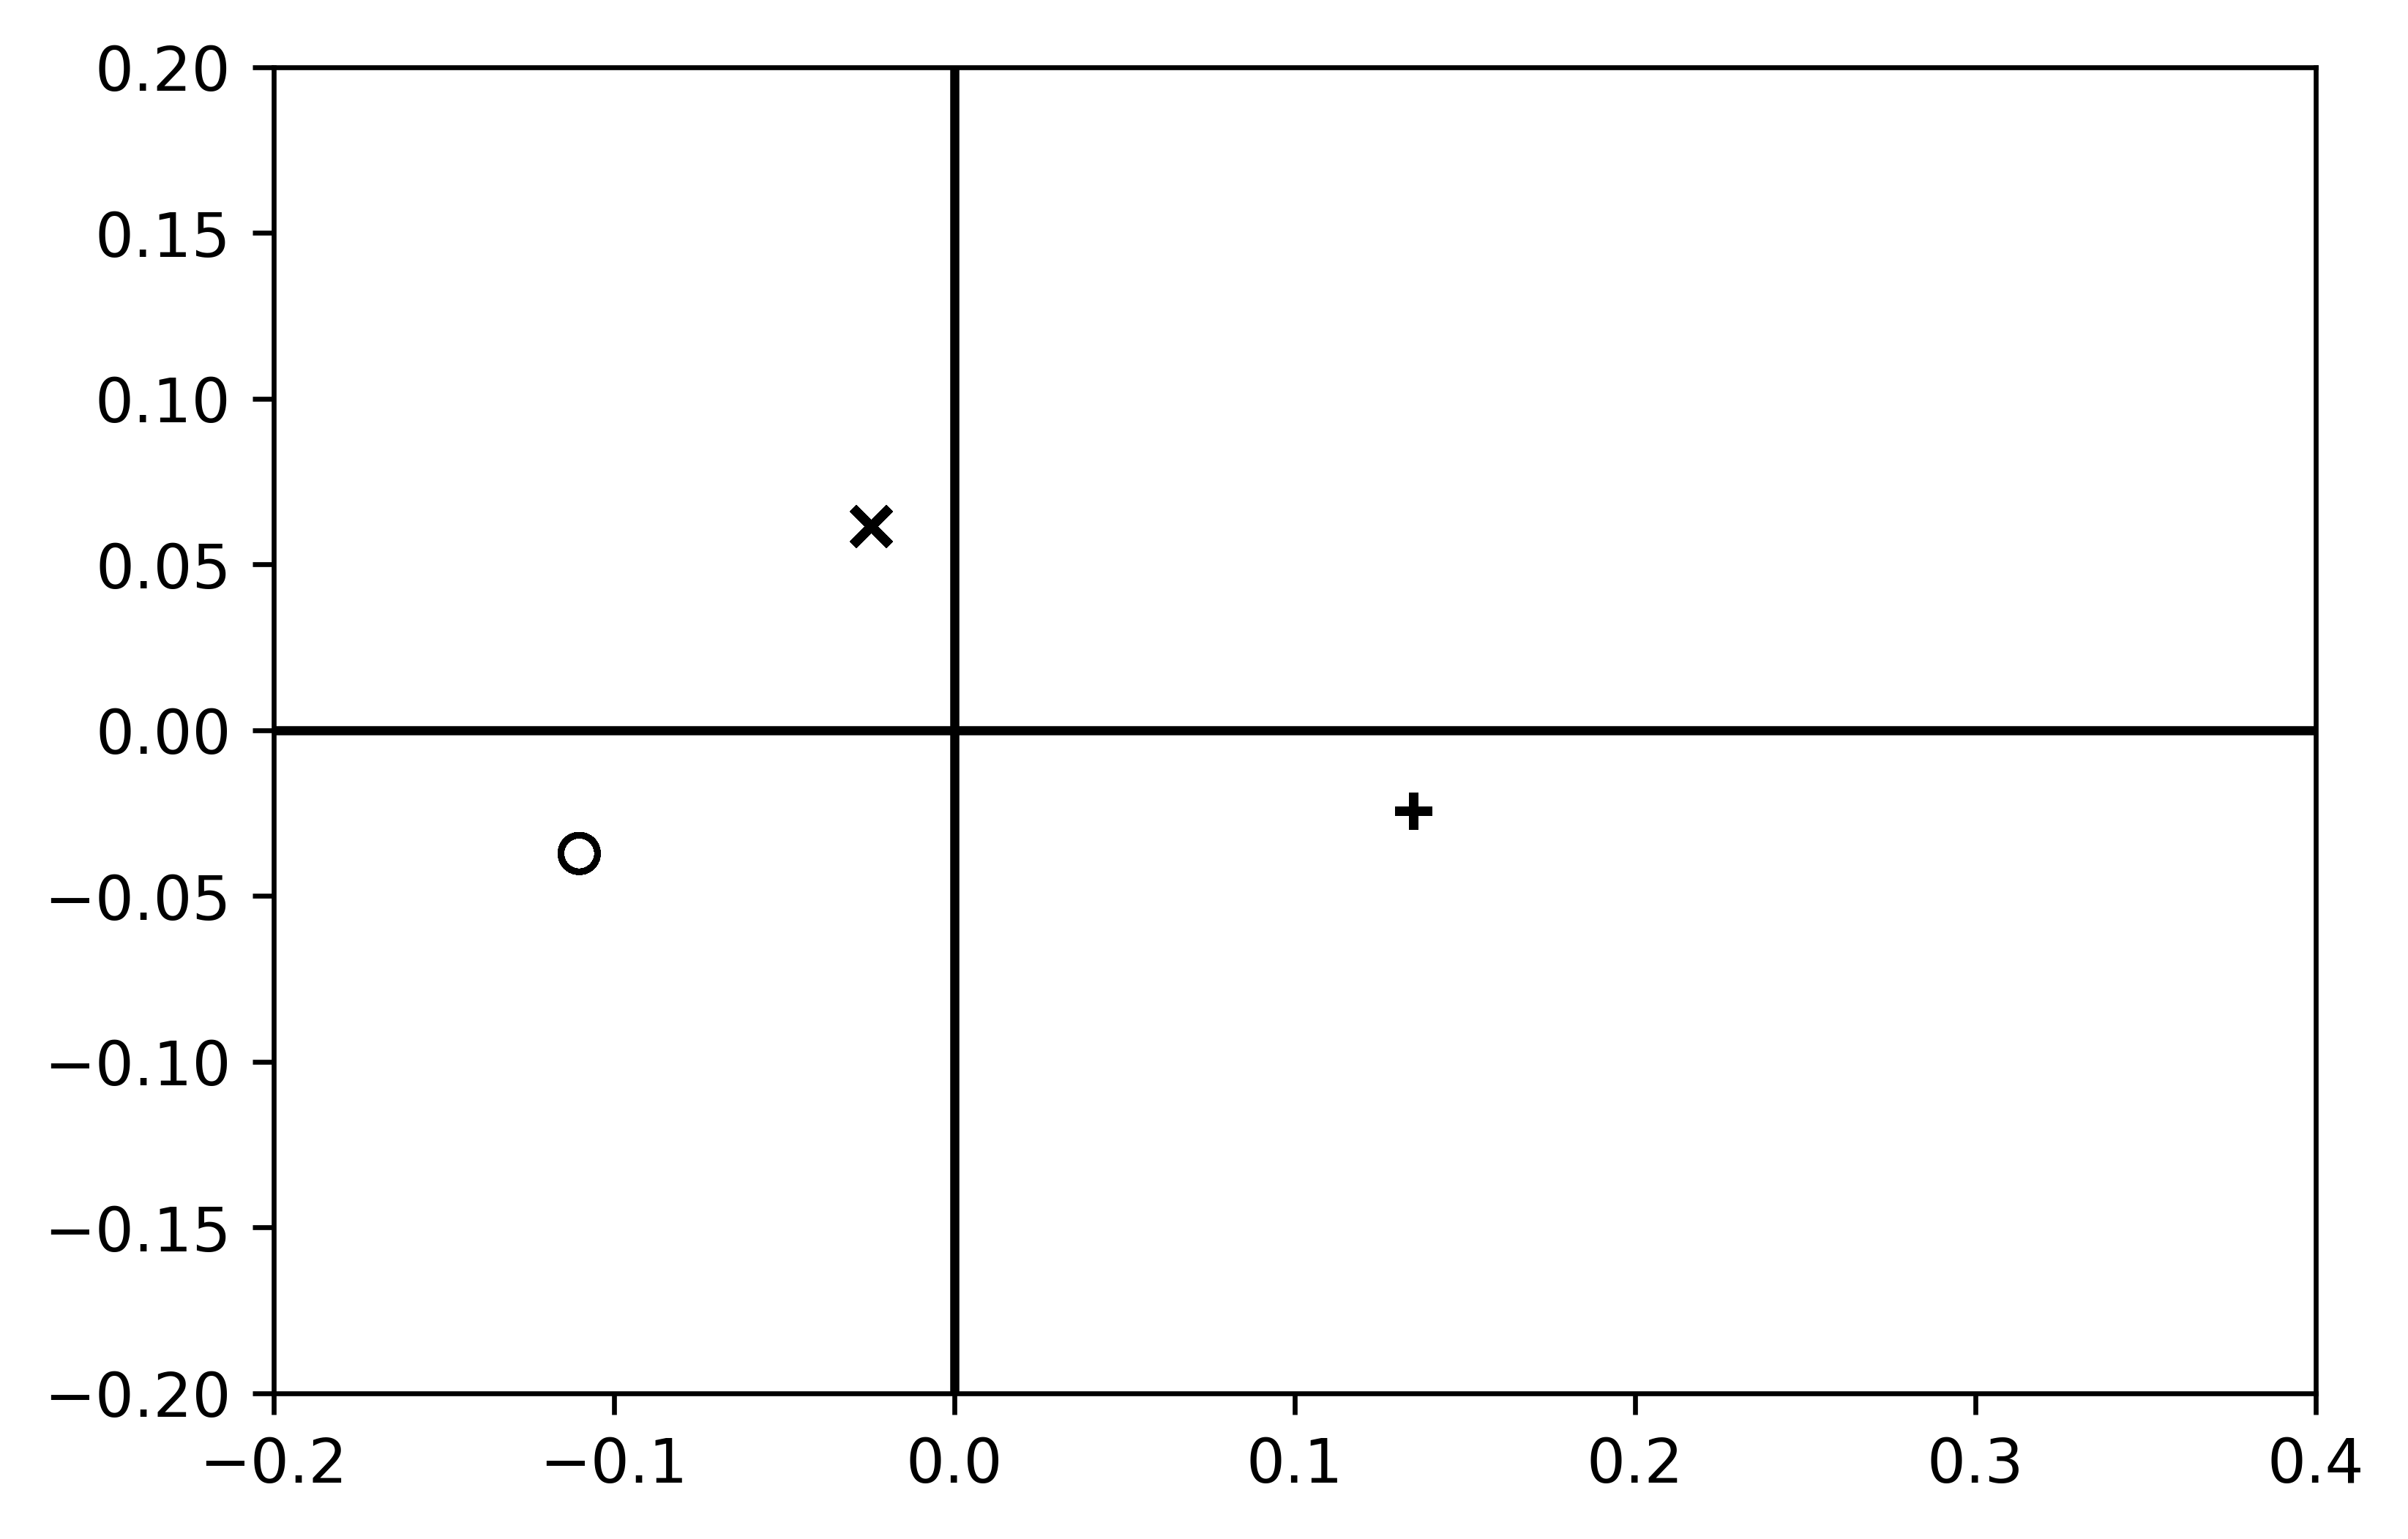

In [8]:
approximateKernel = False
performExperiment ('kfda', approximateKernel)

LDA at Exact Explicit Feature Map. Objective:  2.000000000000002
KFDA (Implicit Feature Space).Objective:  2.0000000000000018


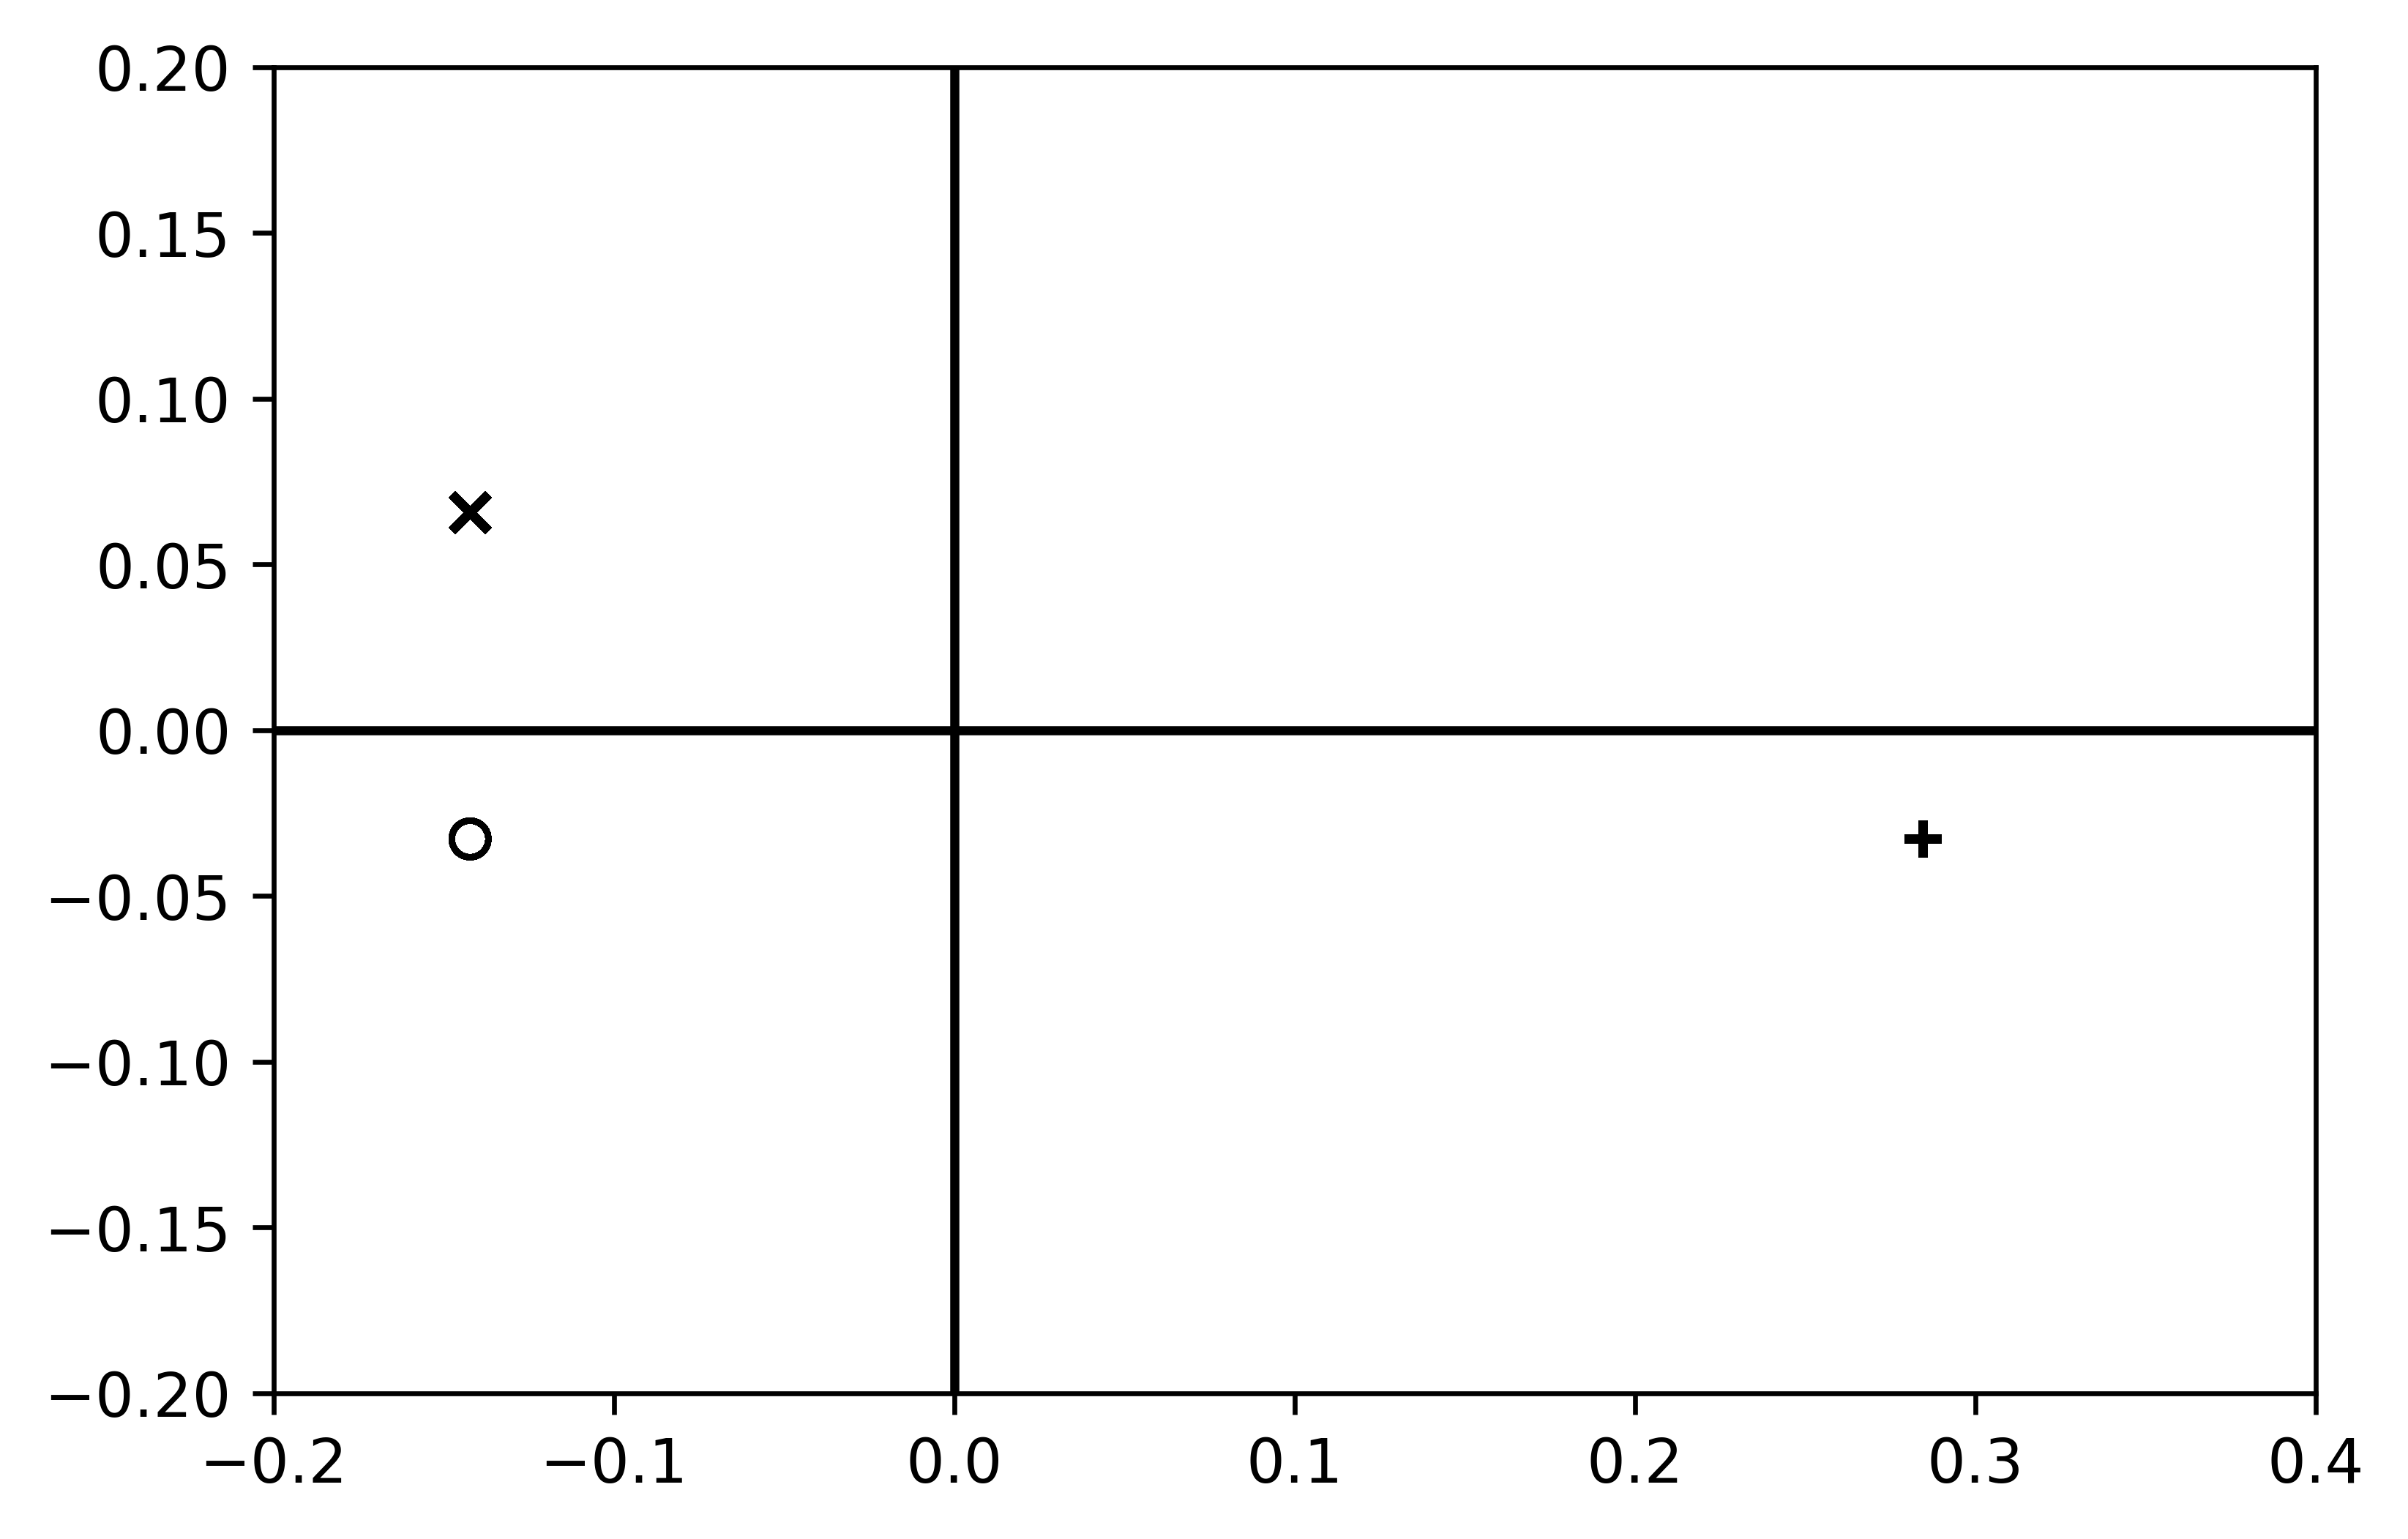

In [9]:
approximateKernel = False
performExperiment ('ghiasi_kfda', approximateKernel)

LDA at Exact Explicit Feature Map. Objective:  1.9858393740953784
KFDA (Implicit Feature Space).Objective:  1.985839374095378


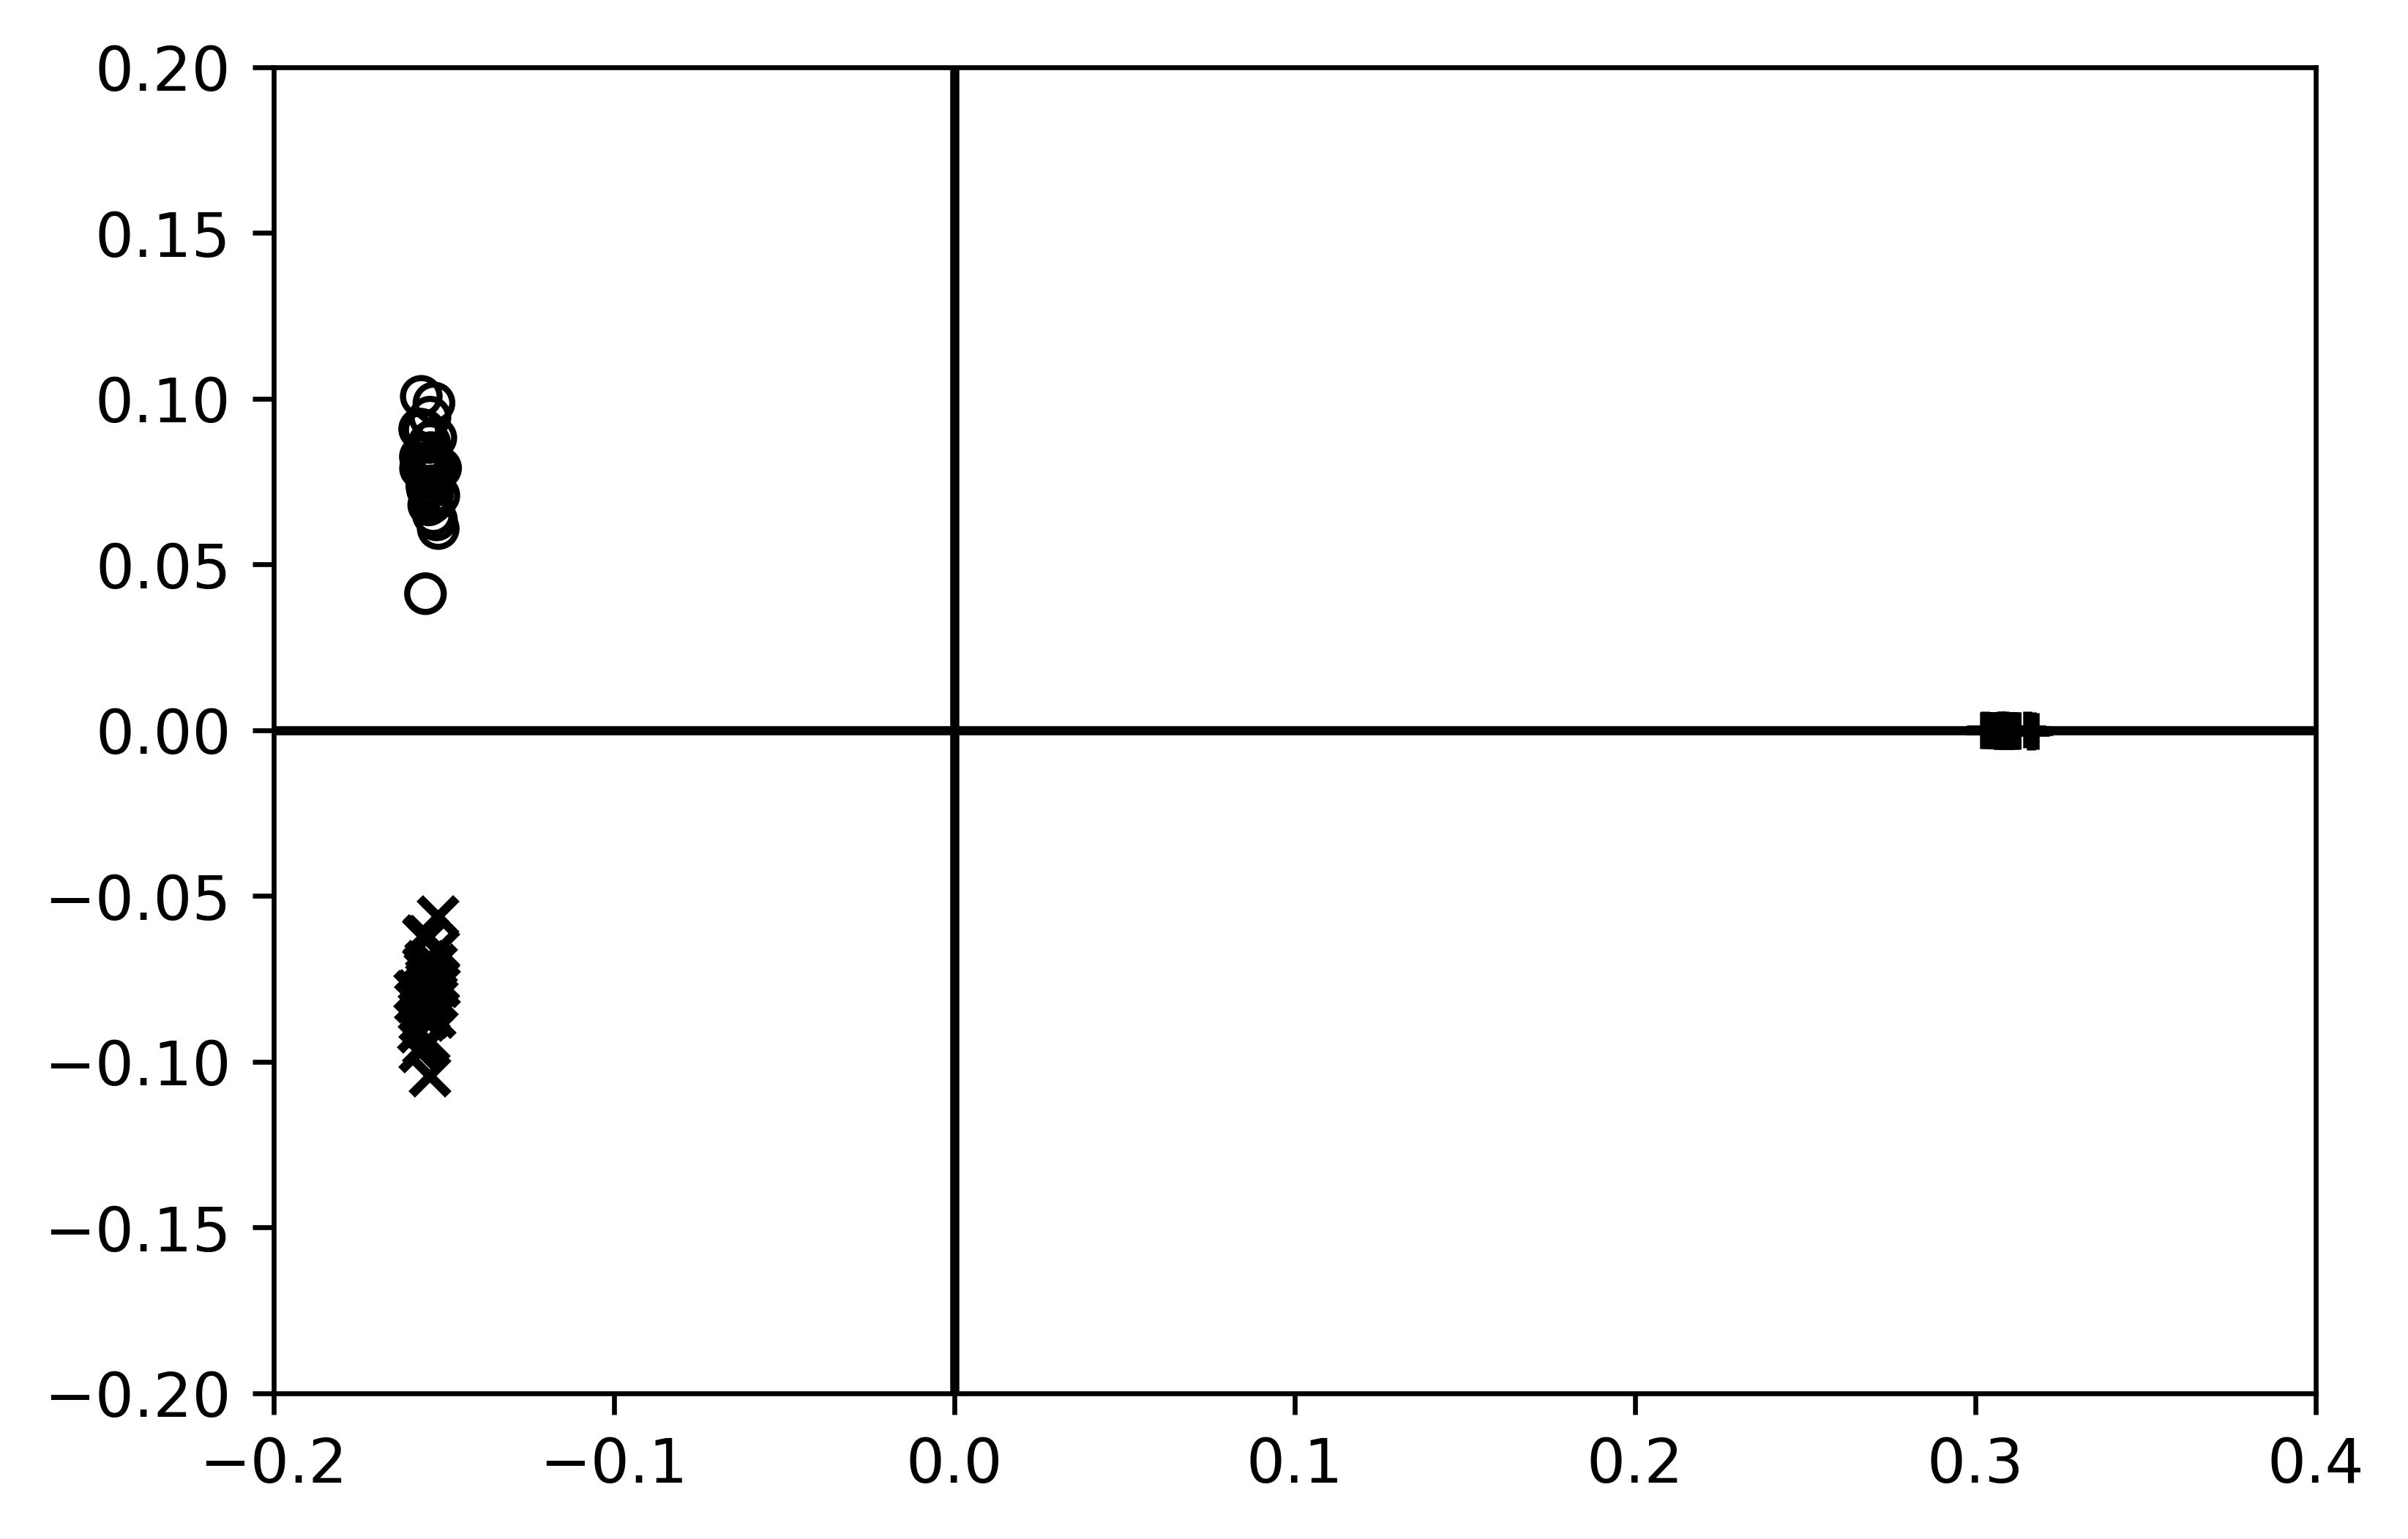

In [10]:
approximateKernel = True
performExperiment ('kfda', approximateKernel)

D:\research\FisherLDA\code.paper.final\KernelLinearDiscriminantAnalysis.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  A[idx, :] = alpha[:, 0] / np.sqrt(alpha.T @ self.centeredKerMat @ alpha)


LDA at Exact Explicit Feature Map. Objective:  1.9858393740953784
KFDA (Implicit Feature Space).Objective:  1.9858393740953773


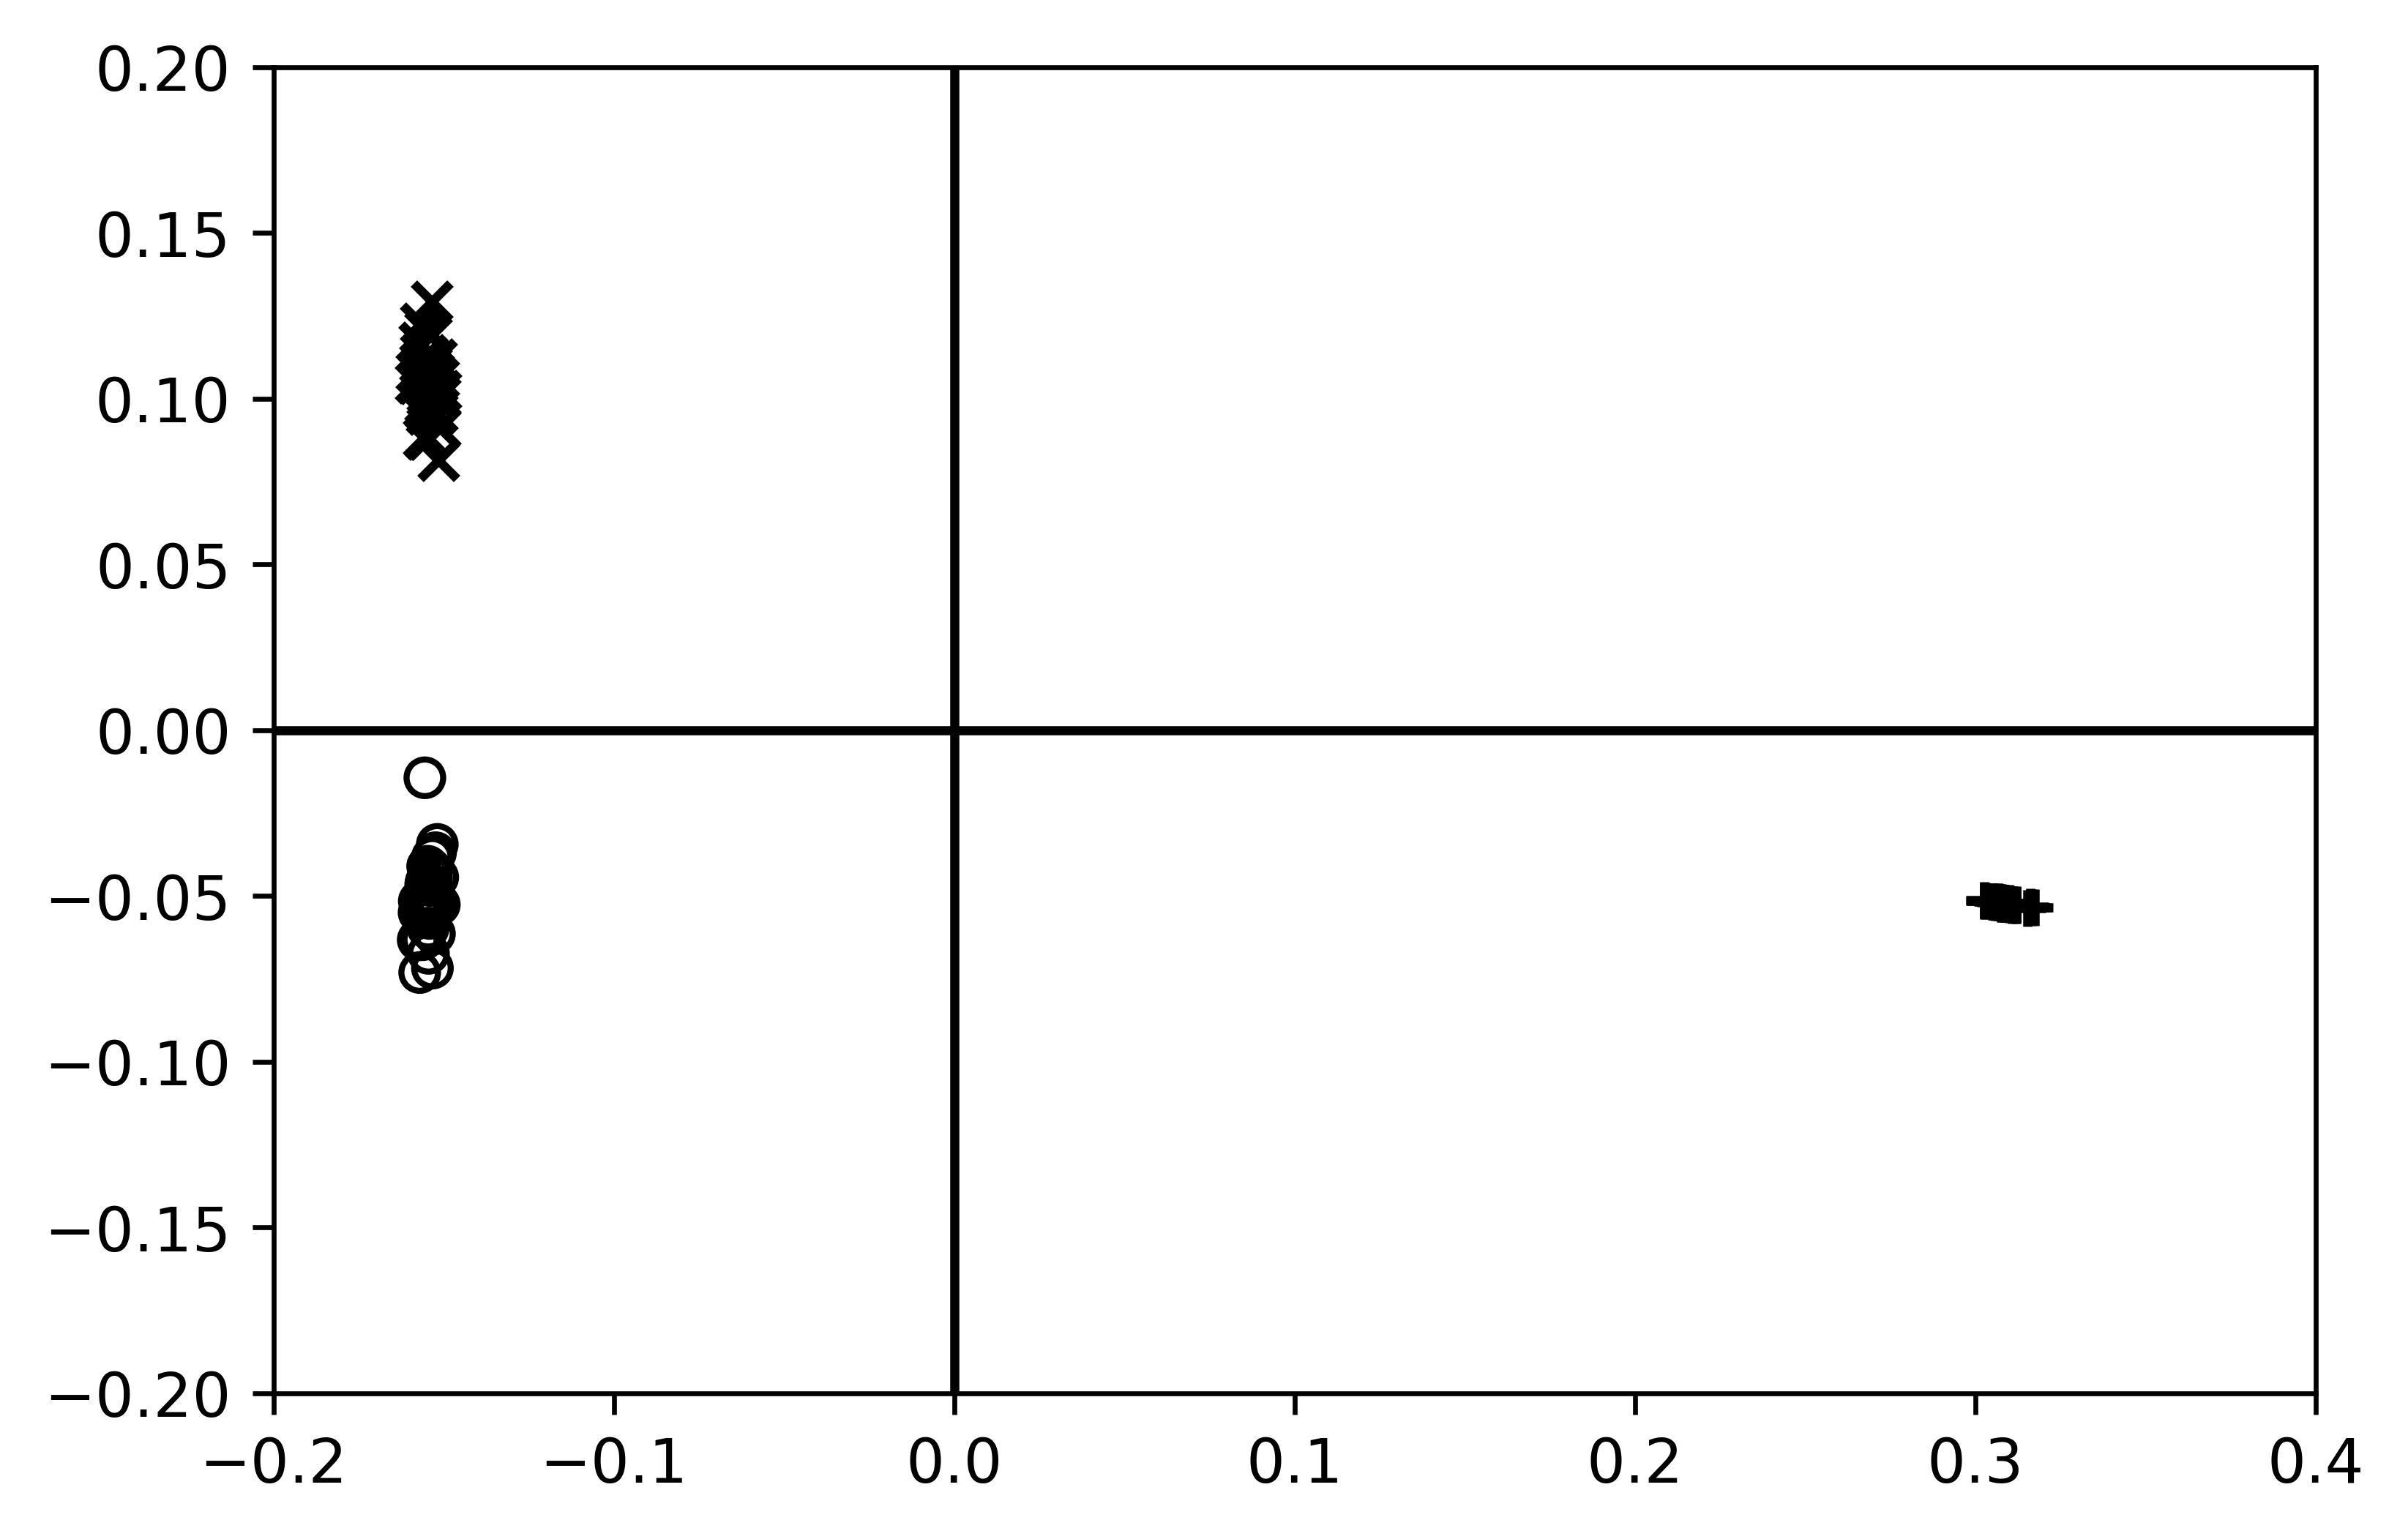

In [11]:
approximateKernel = True
performExperiment ('ghiasi_kfda', approximateKernel)

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> </font>